## Select targets to study

Choosing targets with: 
* impact parameter $b < 0.8$
* effective temperature T_eff:  $5500 < T_{eff} < 6100$
* kepler LC light curves

Write those targets out to `data/kics.csv`

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import numpy as np
from astroquery.exoplanet_orbit_database import ExoplanetOrbitDatabase
import astropy.units as u
from astropy.io import ascii


In [2]:
table = ExoplanetOrbitDatabase.get_table(cache=True)

In [3]:
# Make some cuts!

impact_parameter_cuts = (table['B'] < 0.8) & (table['B'] > 0) & np.logical_not(table['B'].mask)
teff_cuts = (table['TEFF'] < 6100*u.K) & (table['TEFF'] > 5500*u.K) & np.logical_not(table['TEFF'].mask)
kepler_cut = np.logical_not(table['KEPID'].mask)

all_cuts = impact_parameter_cuts & teff_cuts & kepler_cut

cut_table = table[all_cuts]

Number of stars after cuts: 161


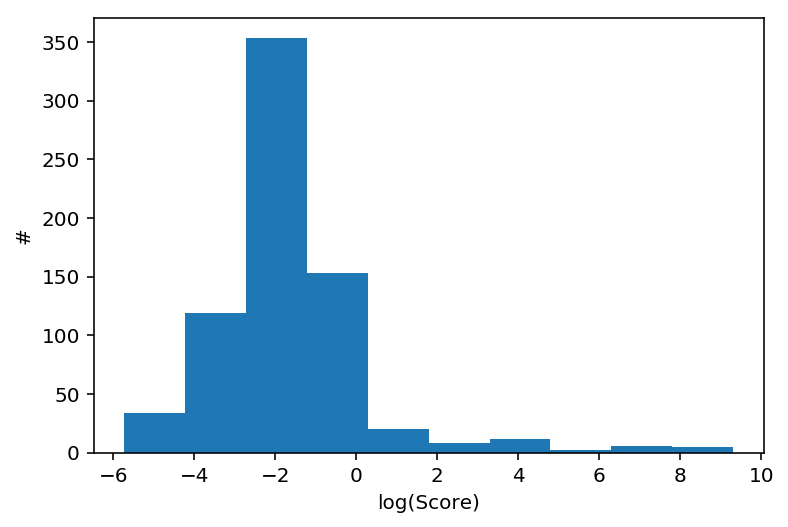

In [4]:
score = cut_table['DEPTH'] * cut_table['T14'] / cut_table['KP'] / cut_table['PER']

high_score_targets = np.log(score) > -1

print("Number of stars after cuts:", np.count_nonzero(high_score_targets))
plt.hist(np.log(score))
plt.ylabel('#')
plt.xlabel('log(Score)')
plt.show()

In [7]:
# Write table:
ascii.write(cut_table[high_score_targets]['KEPID'].data[:, np.newaxis], 'data/kics.csv', format='no_header')